## Data Visualisation

This file displays the catalog information from the GZ1 dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
catalog = pd.read_csv('../Data/gz1_desi_cross_cat_cut.csv')
orig_catalog = pd.read_csv('../Data/gz1_desi_cross_cat.csv')
catalog['P_OTHER'] = catalog['P_EL']+catalog['P_EDGE']+catalog['P_DK']+catalog['P_MG']
orig_catalog['P_OTHER'] = orig_catalog['P_EL']+orig_catalog['P_EDGE']+orig_catalog['P_DK']+orig_catalog['P_MG']

In [3]:
THRESHOLD = 0.5

def get_metrics(catalog, cat_name):
    print(f"\nNumber of galaxies in {cat_name}: {catalog.shape[0]}")
    very_CW_galaxies = catalog[catalog['P_CW']>THRESHOLD]
    very_ACW_galaxies = catalog[catalog['P_ACW']>THRESHOLD]
    very_OTHER_galaxies = catalog[catalog['P_OTHER']>THRESHOLD]
    print(f"Very CW: {very_CW_galaxies.shape[0]} ({very_CW_galaxies.shape[0]/catalog.shape[0]:%}), Very ACW: {very_ACW_galaxies.shape[0]} ({very_ACW_galaxies.shape[0]/catalog.shape[0]:%}), Very OTHER: {very_OTHER_galaxies.shape[0]} ({very_OTHER_galaxies.shape[0]/catalog.shape[0]:%})")

    largest_prob_class = catalog[['P_CW','P_ACW','P_OTHER']].idxmax(axis=1)
    CW_galaxies = np.count_nonzero(largest_prob_class=='P_CW')
    ACW_galaxies = np.count_nonzero(largest_prob_class=='P_ACW')
    OTHER_galaxies = np.count_nonzero(largest_prob_class=='P_OTHER')
    print(f"CW: {CW_galaxies}, ACW: {ACW_galaxies}, OTHER: {OTHER_galaxies}")

## Number of votes per object

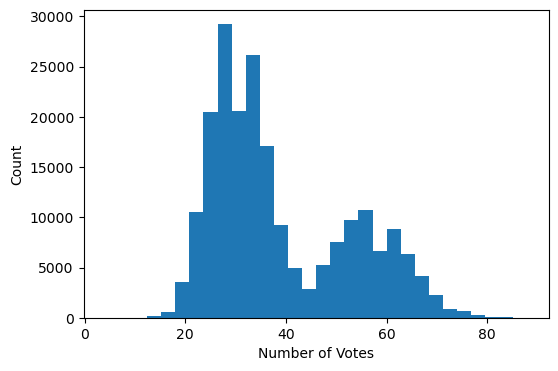

In [4]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot() 
ax.hist(catalog['NVOTE'],bins=30)
ax.set_xlabel("Number of Votes")
ax.set_ylabel("Count")
plt.show()

## Probabilities for galaxy types

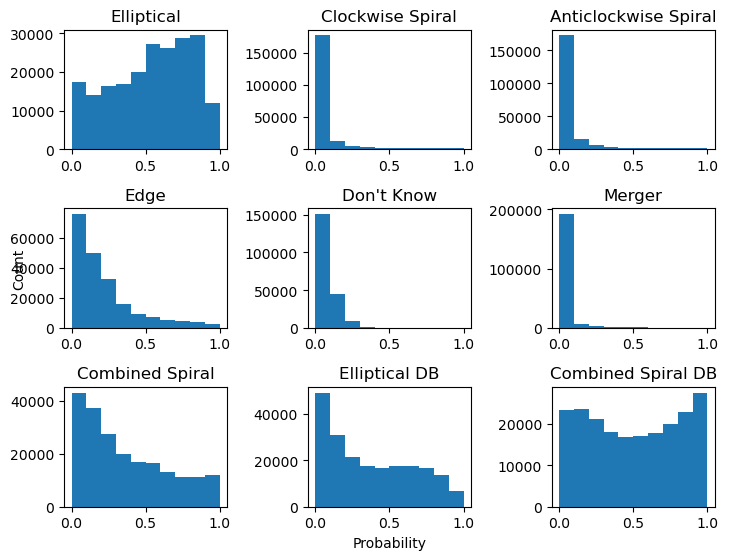

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_xlabel("Probability")
ax.set_ylabel("Count")
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

labels = ["Elliptical","Clockwise Spiral","Anticlockwise Spiral","Edge","Don't Know","Merger","Combined Spiral","Elliptical DB","Combined Spiral DB"]
for i, votetype in enumerate(catalog.columns.values[5:14]):
    ax_i = fig.add_subplot(3,3,i+1)
    ax_i.hist(catalog[votetype],bins=10)
    ax_i.set_title(labels[i])
plt.tight_layout()
plt.show()

In [6]:
def plot_vote_fractions(cat):
    labels = ["P_CW","P_ACW","P_OTHER"]
    nice_labels = ["Clockwise Spiral","Anticlockwise Spiral","Other"]
    fig = plt.figure(figsize=(10,3))
    for i, labels in enumerate(labels):
        ax_i = fig.add_subplot(1,3,i+1)
        ax_i.hist(cat[labels],bins=10,log=True)
        ax_i.set_title(nice_labels[i])
        ax_i.set_ylim(1.5e2,1.5e5)
        if i==0:
            ax_i.set_ylabel("Log Count")
        elif i==1:
            ax_i.set_xlabel("Vote Fractions")
    plt.tight_layout()
    plt.show()

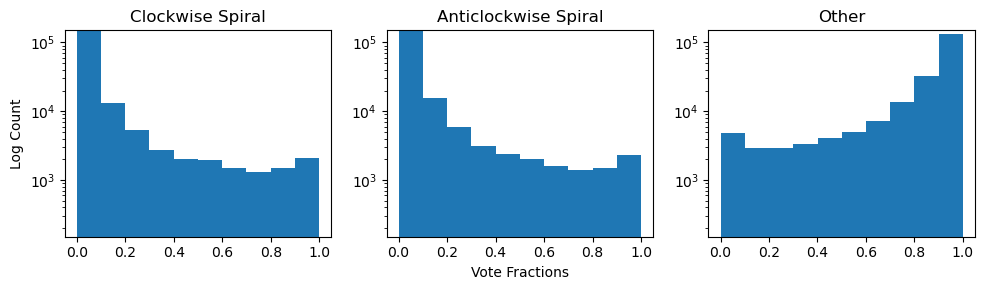

In [7]:
plot_vote_fractions(catalog)

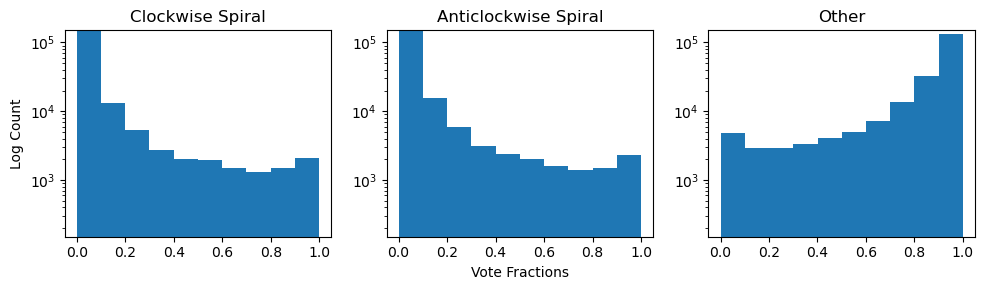

In [8]:
CUT_CATALOG_PATH = '../Data/gz1_desi_cross_cat_cut.csv'
cut_cat = pd.read_csv(CUT_CATALOG_PATH)
plot_vote_fractions(cut_cat)

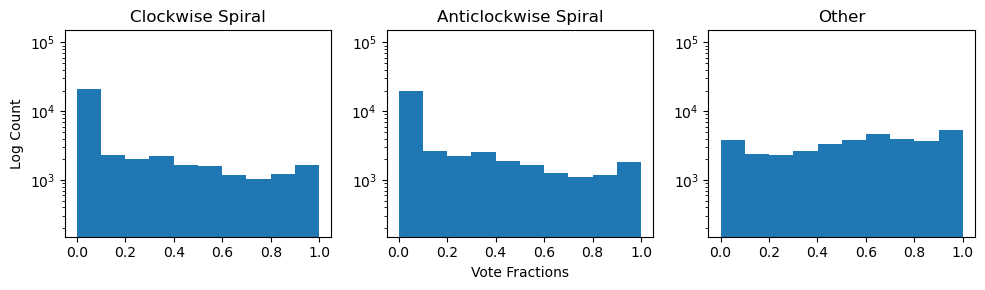

In [9]:
TRAIN_VAL_DOWNSAMPLE_CATALOG_PATH = '../Data/gz1_desi_cross_cat_train_val_downsample.csv'
ds_cut_cat = pd.read_csv(TRAIN_VAL_DOWNSAMPLE_CATALOG_PATH)
plot_vote_fractions(ds_cut_cat)

In [11]:
very_CW_galaxies = catalog[catalog['P_CW']>0.8]
print(f"Number of very CW galaxies in GZ1 catalogue: {very_CW_galaxies.shape[0]}")

very_ACW_galaxies = catalog[catalog['P_ACW']>0.8]
print(f"Number of very ACW galaxies in GZ1 catalogue: {very_ACW_galaxies.shape[0]}")

very_EL_galaxies = catalog[catalog['P_EL']>0.8]
print(f"Number of very EL galaxies in GZ1 catalogue: {very_EL_galaxies.shape[0]}")

Number of very CW galaxies in GZ1 catalogue: 3472
Number of very ACW galaxies in GZ1 catalogue: 3720
Number of very EL galaxies in GZ1 catalogue: 39696
